# <center> Исследование данных HR-агентсва

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Необходимо исследовать данные и сделать выводы по полученным результатам. Подкрепить свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверить, являются ли выводы статистически значимыми.

В процессе своего анализа:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Найти в данных интересные закономерности и отметить их в анализе.

Продемонстрировать использование разных тестов для проверки статистической значимости сделанных выводов:

тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;

тест для категориальных признаков.

Результат работы представить в виде ноутбука (IPYNB-файла) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.

Ответить на вопросы помогут данные о зарплатах в сфере Data Science.

Данные содержат следующие столбцы:

- *work_year* — год, в котором была выплачена зарплата;
- *experience_level* — опыт работы на этой должности в течение года: EN — Entry-level/Junior, MI — Mid-level/Intermediate, SE - Senior-level/Expert, EX — Executive-level/Director;
- *employment_type* — тип трудоустройства для этой роли: PT — неполный рабочий день, FT — полный рабочий день, CT - контракт, FL - фриланс;
- *job_title* — роль, в которой соискатель работал в течение года;
- *salary* — общая выплаченная валовая сумма заработной платы;
- *salary_currency* - валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;
- *salary_in_usd* — зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
- *employee_residence* — основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
- *remote_ratio* — общий объем работы, выполняемой удалённо: 0 — удалённой работы нет (менее 20%), 50 — частично удалённая работа, 100 — полностью удалённая работа (более 80%);
- *company_location* — страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166;
- *company_size* — среднее количество людей, работавших в компании в течение года: S — менее 50 сотрудников (небольшая компания), M — от 50 до 2500 сотрудников (средняя компания), L - более 250 сотрудников (крупная компания).

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [199]:
#Загружаем необходимые библиотека
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [200]:
#Загружаем датасет и проверяем его на работоспособность
ds_salaries = pd.read_csv('data/ds_salaries.csv')

display(ds_salaries.head())
display(ds_salaries.tail())

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [201]:
#Задаем уровень значимости
alpha = 0.05
print(f'Уровень значимости alpha = {alpha}')

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [202]:
#Загрузим общую информацию о датасете
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В исходном датасете 12 признаков, 607 записей (без пропусков), типы данных указаны корректно. Также в датасете имеется 5 числовых признаков и 7 категориальных.

Проверим данные на наличие полных дубликатов:

In [203]:
print('Количество дубликватов: {}'.format(ds_salaries[ds_salaries.duplicated()].shape[0]))



Количество дубликватов: 0


Удалим неинформативные признаки:

In [204]:
ds_salaries.drop(['Unnamed: 0', 'salary', 'salary_currency'],axis=1,inplace=True)
ds_salaries.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [205]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


После удаления неинформативных столбцов в датасете осталось 9 признаков, 607 записей (без пропусков), 3 числовых признака и 6 категориальных признаков.

К числовым признакам относятся:
- *work_year*
- *salary_in_usd*
- *remote_ratio* 

К категориалным признакам относятся:
- *experience_level*
- *employment_type*
- *job_title*
- *employee_residence*
- *company_location*
- *company_size*


### Распределение зарплат по всем работникам в сфере Data Science

#

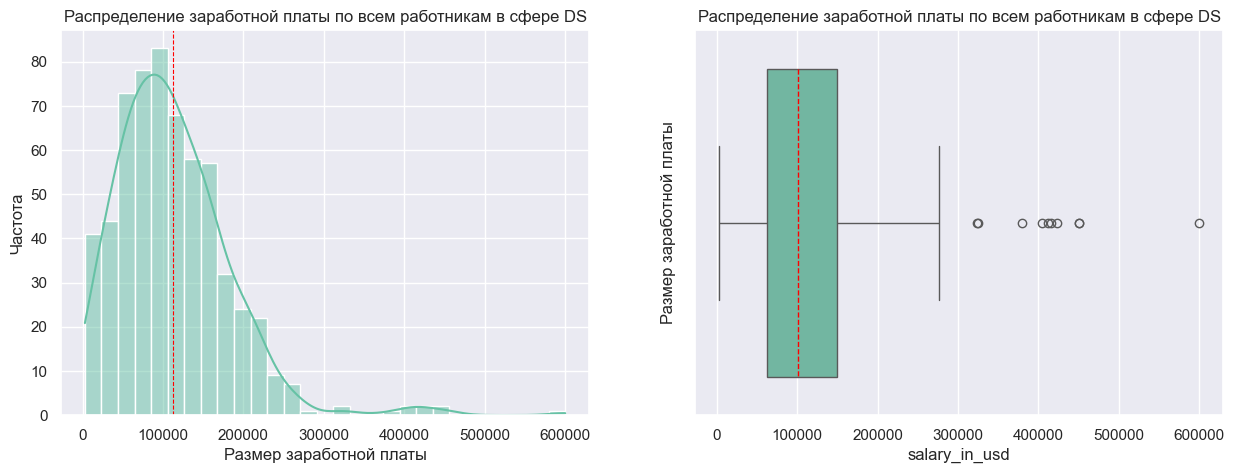

In [206]:
#Строим гистограмму распределения и диаграмму "boxplot"
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns. histplot(ds_salaries['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы по всем работникам в сфере DS')
axes[0].axvline(ds_salaries['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(ds_salaries['salary_in_usd'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
axes[1].set(ylabel='Размер заработной платы')
axes[1].set_title('Распределение заработной платы по всем работникам в сфере DS')

plt.show()

In [207]:
data_agg = ds_salaries['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер заработной платы']
data_agg

,Размер заработной платы
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


Распределение заработной платы отлично от нормального, имеются выбросы.

### Очистка данных от выбросов при помощи метода z-отклонений

In [208]:
#Определим численный показатель ассиметрии
print(np.log(ds_salaries['salary_in_usd'] + 1).skew())

-1.2609004767569614


In [209]:
#Реализуем метод z-отклонения
def outliers_z_score(data, feature, left = 3, right = 3, log_scale=False):

    if log_scale:
        x = np.log(data[feature] + 1)
    else: 
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outlies = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outlies, cleaned

outliers, cleaned = outliers_z_score(ds_salaries, 'salary_in_usd')
print(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонений: 8
Результирующее число записей: 599


Методом z-отклонений было найдено 8 выбросов. Используем очищенный датасет в дальнейшем.

In [210]:
#Перезапишем наш датасет
ds_salaries = cleaned

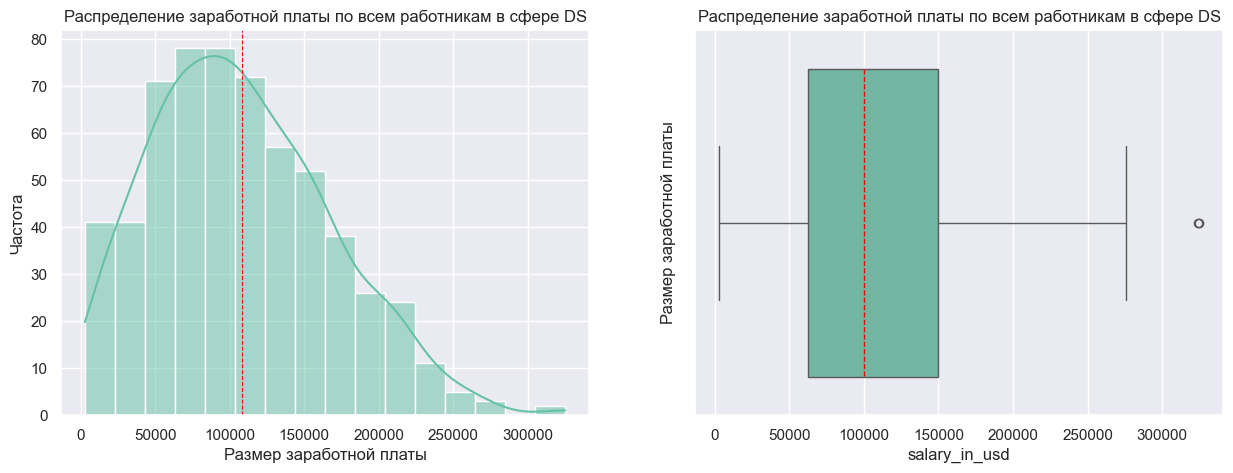

In [211]:
#Построим гистограмму и диаграмму "boxplot" по очищенному датасету
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns. histplot(ds_salaries['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы по всем работникам в сфере DS')
axes[0].axvline(ds_salaries['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(ds_salaries['salary_in_usd'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
axes[1].set(ylabel='Размер заработной платы')
axes[1].set_title('Распределение заработной платы по всем работникам в сфере DS')

plt.show()

## Базовый анализ числовых признаков

### Распределение выплат заработной платы в зависимости от года

In [212]:
#Построим гистограмму по году выплаты заработной платы
fig = px.histogram(
    data_frame=ds_salaries,
    x='work_year',
    title='Распределение года выплаты по всем работникам в сфере DS',
    width=1000,
    height=600,
    nbins=len(ds_salaries['work_year'].unique()),
    histfunc='count'
)
fig.update_xaxes(
    title_text='Год выплаты',
    tickmode='array',
    tickvals=sorted(ds_salaries['work_year'].unique()),
    ticktext=[str(year) for year in sorted(ds_salaries['work_year'].unique())]
)
fig.update_yaxes(title_text='Частота')
fig.show()

Из гистограммы видно, что с каждым годом, количество выплат заработной платы становиться больше. Это может быть связано с увеличением количества работников каждый год.

### Признак объема работы, выполняемой удаленно

In [213]:
#Построим гистограмму по признаку объема работы, выполняемой удаленно
fig = px.histogram(
    data_frame=ds_salaries,
    x='remote_ratio',
    title='Распределение объема удаленной работы по всем работникам в сфере DS',
    width=1000,
    height=600,
    nbins=len(ds_salaries['remote_ratio'].unique()),
    histfunc='count',
)
fig.update_xaxes(
    title_text='Объем удаленной работы, %',
    tickmode='array',
    tickvals=sorted(ds_salaries['remote_ratio'].unique()),
    ticktext=[str(ratio) for ratio in sorted(ds_salaries['remote_ratio'].unique())],
)
fig.update_yaxes(title_text='Частота')
fig.show()


In [214]:
data_agg = ds_salaries['remote_ratio'].describe().round(2).to_frame()
data_agg.columns = ['Объем удаленной работы']
data_agg

,Объем удаленной работы
count,599.00
mean,70.78
std,40.76
min,0.00
25%,50.00
50%,100.00
75%,100.00
max,100.00


Из распределения видно, что основной объем работы выполняется удаленно.

### Распределение выплат заработной платы в зависимости от опыта работы

C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\329454478.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




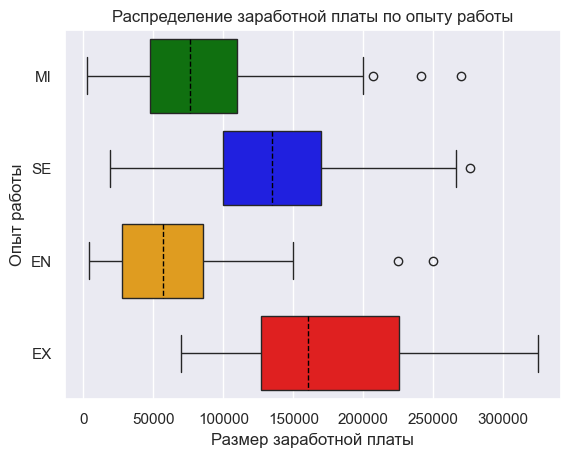

In [215]:
#Построим рапределение выплат заработной платы в зависимости от опыта работы
ax = sns.boxplot(ds_salaries, 
                 x='salary_in_usd', 
                 y='experience_level', 
                 orient='h',
                 palette= ['green', 'blue', 'orange', 'red'], 
                 medianprops={'color':'black', 'linestyle': '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Опыт работы')
plt.title('Распределение заработной платы по опыту работы')
plt.show()

In [216]:
data_agg = ds_salaries.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от опыта работы')
data_agg

Заработная плата в зависимости от опыта работы


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,24.0,173674.71,72039.57,69741.0,127046.75,160771.0,225500.00,325000.0
MI,210.0,82953.14,48222.34,2859.0,47461.50,76357.0,110000.00,270000.0
SE,277.0,135797.26,51162.12,18907.0,100000.00,135000.0,170000.00,276000.0


Распределение заработной платы закономерно. С увеличением опыта работы заработная плата растет.

### Распределение разаботной платы в зависимости от типа трудоустройства

C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\3912474052.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




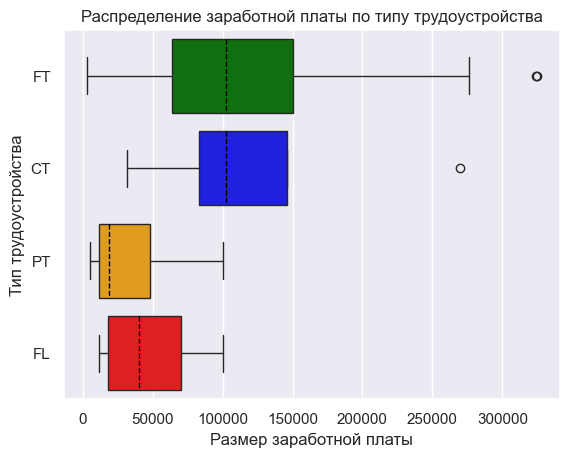

In [217]:
#Построим рапределение выплат заработной платы в зависимости от опыта работы
ax = sns.boxplot(ds_salaries, 
                 x='salary_in_usd', 
                 y='employment_type', 
                 orient='h',
                 palette= ['green', 'blue', 'orange', 'red'], 
                 medianprops={'color':'black', 'linestyle': '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Тип трудоустройства')
plt.title('Распределение заработной платы по типу трудоустройства')
plt.show()

In [218]:
data_agg = ds_salaries.groupby('employment_type')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от типа трудоустройства')
data_agg

Заработная плата в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,4.0,126718.75,101177.15,31875.0,82968.75,102500.0,146250.0,270000.0
FL,4.0,48000.00,40529.82,12000.0,18000.00,40000.0,70000.0,100000.0
FT,581.0,109465.11,59014.10,2859.0,63900.00,102839.0,150000.0,325000.0
PT,10.0,33070.50,31472.91,5409.0,12000.00,18817.5,48370.0,100000.0


В основном наблюдается тип трудоустройства на полный рабочий день. Самая высокая заработная плата, также у работников с полным рабочим днем.

### Заработная плата работника в зависимоти от его роли

In [219]:
#Построим иерархическую диаграмму зависимости заработной платы работника от его роли
treemap_data = ds_salaries.groupby(
    by='job_title',
    as_index=False
)['salary_in_usd'].mean()

fig = px.treemap(
    data_frame= treemap_data,
    path=['job_title'],
    values='salary_in_usd',
    height=500,
    width=1000
)
fig.show()

In [220]:
data_agg = ds_salaries.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от роли сотрудника')
data_agg[:10]

Заработная плата в зависимости от роли сотрудника


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,1.0,5409.00,NaN,5409.0,5409.00,5409.0,5409.0,5409.0
AI Scientist,7.0,66135.57,70152.16,12000.0,15026.50,45896.0,87500.0,200000.0
Analytics Engineer,4.0,175000.00,29508.08,135000.0,165000.00,179850.0,189850.0,205300.0
Applied Data Scientist,4.0,124568.75,54645.55,54238.0,96087.25,133518.5,162000.0,177000.0
Applied Machine Learning Scientist,3.0,48425.00,23244.72,31875.0,35137.50,38400.0,56700.0,75000.0
BI Data Analyst,6.0,74755.17,50989.56,9272.0,40944.25,76500.0,99500.0,150000.0
Big Data Architect,1.0,99703.00,NaN,99703.0,99703.00,99703.0,99703.0,99703.0
Big Data Engineer,8.0,51974.00,42954.76,5882.0,17557.00,41305.5,79756.0,114047.0
Business Data Analyst,5.0,76691.20,43814.85,18442.0,59102.00,70912.0,100000.0,135000.0


Из иерархической диаграммы хорошо видно, что зарплаты у сотрудников зависят от их роли. На ролях Data Scientist и Data Engineer очень близки. Но все же у Data Enginner зарплата выше.

### Заработная плата сотрудника в зависимости от страны проживания

In [221]:
#Построим иерархическую диаграмму распределения заработной платы сотрудника от страны проживания
treemap_data = ds_salaries.groupby(
    by='employee_residence',
    as_index=False
)['salary_in_usd'].mean()

fig = px.treemap(
    data_frame= treemap_data,
    path=['employee_residence'],
    values='salary_in_usd',
    height=500,
    width=1000
)
fig.show()

In [222]:
data_agg = ds_salaries.groupby('employee_residence')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от страны проживания сотрудника')

data_agg[45:]

Заработная плата в зависимости от страны проживания сотрудника


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
PR,1.0,160000.00,NaN,160000.0,160000.00,160000.0,160000.00,160000.0
PT,6.0,42862.50,21443.78,10000.0,29032.25,53090.0,57691.25,60757.0
RO,2.0,51419.00,35940.82,26005.0,38712.00,51419.0,64126.00,76833.0
RS,1.0,25532.00,NaN,25532.0,25532.00,25532.0,25532.00,25532.0
RU,4.0,105750.00,84255.07,48000.0,57000.00,72500.0,121250.00,230000.0
SG,2.0,104176.50,21047.03,89294.0,96735.25,104176.5,111617.75,119059.0
SI,2.0,63831.00,55165.64,24823.0,44327.00,63831.0,83335.00,102839.0
TN,1.0,31875.00,NaN,31875.0,31875.00,31875.0,31875.00,31875.0
TR,3.0,20096.67,7956.76,12103.0,16137.00,20171.0,24093.50,28016.0


Заработная плата зависит от местонахождения сотрудника. Из диаграммы видно, что Россия занимает 7 место по заработным платам среди специалистов

### Заработная плата сотрудников в зависимости от местонахождения главного офиса компании

In [223]:
#Построим иерархическую диаграмму распределения заработной платы сотрудника от местонахождения главного офиса компании
treemap_data = ds_salaries.groupby(
    by='company_location',
    as_index=False
)['salary_in_usd'].mean()

fig = px.treemap(
    data_frame= treemap_data,
    path=['company_location'],
    values='salary_in_usd',
    height=500,
    width=1000
)
fig.show()

In [224]:
data_agg = ds_salaries.groupby('company_location')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от местонахождения главного офиса компании')
data_agg[40:]

Заработная плата в зависимости от местонахождения главного офиса компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
PL,4.0,66082.50,58863.60,28476.0,33811.50,41093.5,73364.5,153667.0
PT,4.0,47793.75,17789.25,21983.0,43130.75,54217.5,58880.5,60757.0
RO,1.0,60000.00,NaN,60000.0,60000.00,60000.0,60000.0,60000.0
RU,2.0,157500.00,102530.48,85000.0,121250.00,157500.0,193750.0,230000.0
SG,1.0,89294.00,NaN,89294.0,89294.00,89294.0,89294.0,89294.0
SI,2.0,63831.00,55165.64,24823.0,44327.00,63831.0,83335.0,102839.0
TR,3.0,20096.67,7956.76,12103.0,16137.00,20171.0,24093.5,28016.0
UA,1.0,13400.00,NaN,13400.0,13400.00,13400.0,13400.0,13400.0
US,347.0,137186.22,52980.68,5679.0,100000.00,135000.0,168937.5,325000.0


Заработная плата сотрудника зависит от местонахождения главного офиса компании. В данном случае самая высокая зарплата у сотрудников с главным офисом компании в России

### Заработная плата сотрудников от размера компании

C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\987598912.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




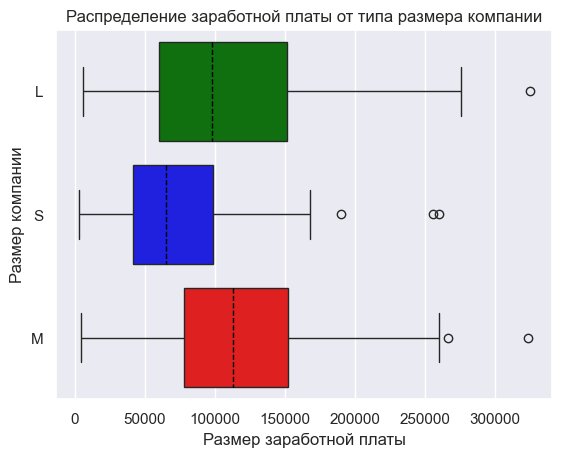

In [225]:
#Построим рапределение выплат заработной платы в зависимости от размера компании
ax = sns.boxplot(ds_salaries, 
                 x='salary_in_usd', 
                 y='company_size',
                 orient='h',
                 palette= ['green', 'blue', 'red'], 
                 medianprops={'color':'black', 'linestyle': '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Размер компании')
plt.title('Распределение заработной платы от типа размера компании')
plt.show()

In [226]:
data_agg = ds_salaries.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от местонахождения главного офиса компании')
data_agg

Заработная плата в зависимости от местонахождения главного офиса компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,192.0,109063.09,63669.51,5882.0,59775.5,98141.0,151250.0,325000.0
M,325.0,115880.56,56412.60,4000.0,78000.0,112900.0,152500.0,324000.0
S,82.0,73506.24,51443.02,2859.0,41816.0,65000.0,98936.5,260000.0


Заработная плата сотрудников зависит от размера компании. Самая высокая заработная плата наблюдается в большой компании. Но медианная заработная плата выше в компании со средним размером.

## Статистический анализ данных

In [227]:
#Функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным.'.format(alpha))
        
#Функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
        

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist ?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы специалистов Data Scientist становится меньше или не изменяется с каждым годом: 2020 год ($μ_1$), 2021 год ($μ_2$), 2022 год ($μ_3$). 

$$ H_0 : μ_1 >= μ_2 >= μ_3 $$

*Альтернативная гипотеза* ($H_1$): размер заработной платы специалистов Data Scientist растет с каждым годом: 2020 год ($μ_1$), 2021 год ($μ_2$), 2022 год ($μ_3$). 

$$ H_1 : μ_1 < μ_2 < μ_3 $$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределен ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального. 

In [228]:
#Дата фрейм только со специалистами Data Scientist

data_scientist_df = ds_salaries[ds_salaries['job_title'] == 'Data Scientist']

#Значения зарплат 
salary_in_2020 = data_scientist_df.loc[data_scientist_df['work_year'] == 2020, 'salary_in_usd']
salary_in_2021 = data_scientist_df.loc[data_scientist_df['work_year'] == 2021, 'salary_in_usd']
salary_in_2022 = data_scientist_df.loc[data_scientist_df['work_year'] == 2022, 'salary_in_usd']

#Проводим тест Шапиро-Уилка
print('2020 год:')
result = stats.shapiro(salary_in_2020)
decision_normality(result[1])

print('2021 год:')
result = stats.shapiro(salary_in_2021)
decision_normality(result[1])

print('2022 год:')
result = stats.shapiro(salary_in_2022)
decision_normality(result[1])

2020 год:
p-value = 0.145
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
2021 год:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
2022 год:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип признака "Размер заработной платы"? - Количественный.
* Сколько сравниваемых групп? - Три.
* Группы зависимы? - Нет.
* Признак распределен по нормальному закону? - Да.

Чтобы проверить нашу гипотезу, можно использовать однофакторный дисперсионный анализ (ANOVA).

**Проведем тест**


In [229]:
#Проводим тест
_, p = stats.f_oneway(salary_in_2020, salary_in_2021, salary_in_2022)
decision_hypothesis(p) 

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Есть основания утверждать, что с каждым годом растет заработная плата у специалистов Data Scientist.

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$) : размер заработной платы Data Scientist ($μ_1$) и Data Engineer ($μ_2$) в 2022 году не отличается.

$$ H_0 : μ_1 = μ_2 $$

*Альтернативная гипотеза* ($H_1$) : размер заработной платы Data Scientist ($μ_1$) и Data Engineer ($μ_2$) в 2022 году различается.

$$ H_1 : μ_1 \neq μ_2 $$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [230]:
#Подготовка данных для анализа
df_salary_in_2022 = ds_salaries[ds_salaries['work_year'] == 2022]
salary_DS = df_salary_in_2022.loc[df_salary_in_2022['job_title'] == 'Data Scientist', 'salary_in_usd']
salary_DE = df_salary_in_2022.loc[df_salary_in_2022['job_title'] == 'Data Engineer', 'salary_in_usd']

#Проводим тест Шапиро-Уилка
print('Data Scientist:')
result = stats.shapiro(salary_DS)
decision_normality(result[1])

print('Data Engineer:')
result = stats.shapiro(salary_DE)
decision_normality(result[1])


Data Scientist:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Data Engineer:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип признака "Размер заработной платы"? - Количественный.
* Сколько сравниваемых групп? - Две.
* Группы зависимы? - Нет.
* Признак распределен по нормальному закону? - Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни.


**Проведем тест**


In [231]:
#Проводим тест
_, p = stats.mannwhitneyu(salary_DS, salary_DE)
decision_hypothesis(p)

p-value = 0.155
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать что размер заработной платы в 2022 году у Data Science и Data Engineer отличаются.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях разных рамеров?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$) : размер заработной платы Data Scientist не зависит от размера компании: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза* ($H_1$) : размер заработной платы Data Scientist зависит от размера компании: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [232]:
#Подготовка данных для анализа
data_scientist_df = ds_salaries[ds_salaries['job_title'] == 'Data Scientist']
salary_in_S = data_scientist_df.loc[data_scientist_df['company_size'] == 'S', 'salary_in_usd']
salary_in_M = data_scientist_df.loc[data_scientist_df['company_size'] == 'M', 'salary_in_usd']
salary_in_L = data_scientist_df.loc[data_scientist_df['company_size'] == 'L', 'salary_in_usd']

#Проводим тест Шапиро-Уилка
print('Для S компании:')
result = stats.shapiro(salary_in_S)
decision_normality(result[1])

print('Для M компании:')
result = stats.shapiro(salary_in_M)
decision_normality(result[1])

print('Для L компании:')
result = stats.shapiro(salary_in_L)
decision_normality(result[1])


Для S компании:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для M компании:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для L компании:
p-value = 0.042
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип признака "Размер заработной платы"? - Количественный.
* Сколько сравниваемых групп? - Три.
* Группы зависимы? - Нет.
* Признак распределен по нормальному закону? - Нет.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса.


**Проведем тест**


In [233]:
#Проводим тест
_, p = stats.kruskal(salary_in_S, salary_in_M, salary_in_L)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Есть основания утверждать, что размер заработной платы Data Scientist зависит от размера компании в которой работает специалист.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между тем, есть ли наличие должностей Data Scientist и Data Engineer, и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между тем, есть ли наличие должностей Data Scientist и Data Engineer, и размером компании есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [234]:
#Подготовка данных для анализа
df_DS_and_DE = ds_salaries[(ds_salaries['job_title'] == 'Data Scientist') | (ds_salaries['job_title'] == 'Data Engineer')]

#Составляем таблицу сопряженности
cross_table = pd.crosstab(df_DS_and_DE['job_title'], df_DS_and_DE['company_size'])

cross_table

company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,44,77,21


In [235]:
#Проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.009
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer, и размером компании.

## Итоговые результаты исследования

* Есть основания утверждать, что с каждым годом растет заработная плата у специалистов Data Scientist.

* Нет оснований утверждать что размер заработной платы в 2022 году у Data Science и Data Engineer отличаются.

* Есть основания утверждать, что размер заработной платы Data Scientist зависит от размера компании в которой работает специалист.

* Существует статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer, и размером компании.

## Самостоятельная формулировка дополнительных гипотез

**Дополнительные вопросы**

* Наблюдается ли рост заработных плат у специалистов Data Science с повышением их опыта работы?

* Зависят ли заработные платы специалистов Data Science и Data Engineer от типа трудоустройства?

### Наблюдается ли рост заработных плат у специалистов Data Science с повышением их опыта работы?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы специалистов Data Scientist становится меньше или не изменяется в зависимости от их опыта работы: EN ($μ_1$), MI ($μ_2$), SE ($μ_3$), EX ($μ_4$). 

$$ H_0 : μ_1 >= μ_2 >= μ_3 >= μ_4 $$

*Альтернативная гипотеза* ($H_1$): размер заработной платы специалистов Data Scientist растет в зависимости от их опыта работы: EN ($μ_1$), MI ($μ_2$), SE ($μ_3$), EX ($μ_4$). 

$$ H_1 : μ_1 < μ_2 < μ_3 < μ_4 $$

In [236]:
#Подготовка данных для визуального анализа
data_scientist_df = ds_salaries[ds_salaries['job_title'] == 'Data Scientist']


**Визуальный анализ данных**

C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\3594863265.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\3594863265.py:1: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



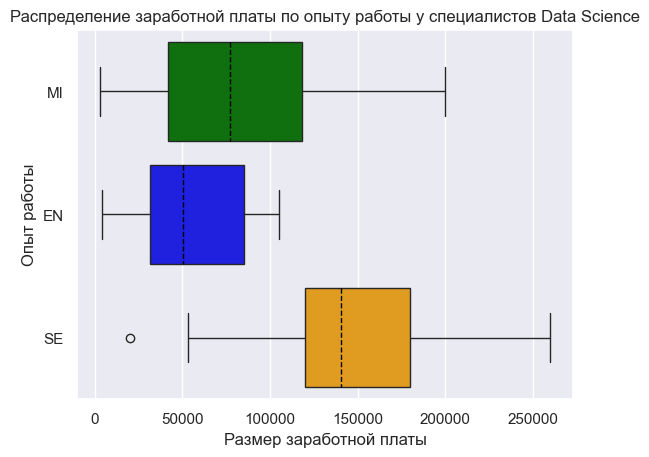

In [237]:
ax = sns.boxplot(data_scientist_df, 
                 x='salary_in_usd', 
                 y='experience_level', 
                 orient='h',
                 palette= ['green', 'blue', 'orange', 'red'], 
                 medianprops={'color':'black', 'linestyle': '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Опыт работы')
plt.title('Распределение заработной платы по опыту работы у специалистов Data Science')
plt.show()

In [238]:
data_agg = data_scientist_df.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от опыта работы у специалистов Data Science')
data_agg

Заработная плата в зависимости от опыта работы у специалистов Data Science


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,22.0,55330.91,31237.82,4000.0,31474.0,50483.5,85027.25,105000.0
MI,60.0,82039.13,46869.58,2859.0,41768.0,77479.0,118264.75,200000.0
SE,60.0,148653.87,48806.50,20171.0,120000.0,140400.0,180000.00,260000.0


Из визуального анализа можно сделать вывод, что ни один из специалистов Data Science не имеет опыт работы Executive-level/Director. На первый взгляд, можно сказать, что с увеличением опыта работы, зарплаты специалистов растут.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [239]:
#Подготовка данных для проверки на нормальность
salary_EN = data_scientist_df.loc[data_scientist_df['experience_level'] == 'EN', 'salary_in_usd']
salary_MI = data_scientist_df.loc[data_scientist_df['experience_level'] == 'MI', 'salary_in_usd']
salary_SE = data_scientist_df.loc[data_scientist_df['experience_level'] == 'SE', 'salary_in_usd']

#Проводим тест Шапиро-Уилка
print('Для опыта работы EN:')
result = stats.shapiro(salary_EN)
decision_normality(result[1])

print('Для опыта работы MI:')
result = stats.shapiro(salary_MI)
decision_normality(result[1])

print('Для опыта работы SE:')
result = stats.shapiro(salary_SE)
decision_normality(result[1])

Для опыта работы EN:
p-value = 0.174
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для опыта работы MI:
p-value = 0.178
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для опыта работы SE:
p-value = 0.541
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип признака "Размер заработной платы"? - Количественный.
* Сколько сравниваемых групп? - Три.
* Группы зависимы? - Нет.
* Признак распределен по нормальному закону? - Да.

Чтобы проверить нашу гипотезу, можно использовать однофакторный дисперсионный анализ (ANOVA).


**Проведем тест**

In [240]:
#Проводим тест
_, p = stats.f_oneway(salary_EN, salary_MI, salary_SE)
decision_hypothesis(p) 

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Есть основания утверждать, что с увеличением опыта работы у специалистов Data Science растет заработная плата.

### Зависят ли заработные платы специалистов Data Science и Data Engineer от типа трудоустройства?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$) : размер заработной платы Data Scientist и Data Engineer не зависит от типа трудоустройства:  PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL ($μ_4$) .

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$

*Альтернативная гипотеза* ($H_1$) : размер заработной платы Data Scientist и Data Engineer зависит от типа трудоустройства:  PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL ($μ_4$) .

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$


In [241]:
#Подготовка данных для визуального анализа
df_DS_and_DE = ds_salaries[(ds_salaries['job_title'] == 'Data Scientist') | (ds_salaries['job_title'] == 'Data Engineer')]

**Визуальный анализ данных**

C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\3269200856.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\3269200856.py:1: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



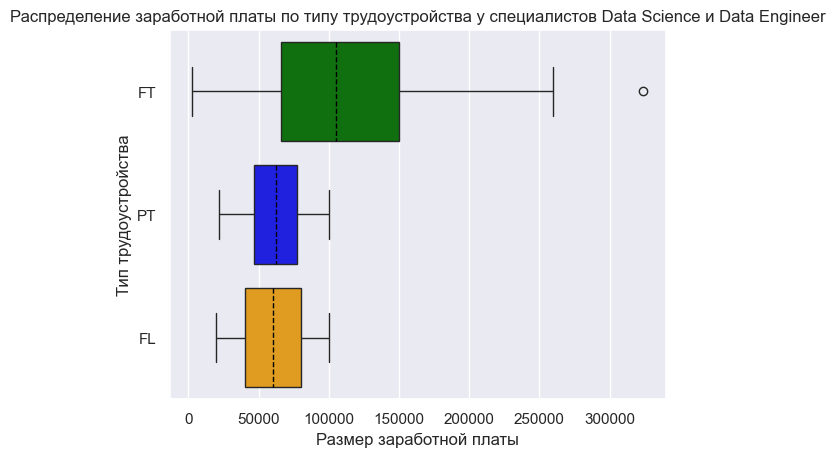

In [242]:
ax = sns.boxplot(df_DS_and_DE, 
                 x='salary_in_usd', 
                 y='employment_type', 
                 orient='h',
                 palette= ['green', 'blue', 'orange', 'red'], 
                 medianprops={'color':'black', 'linestyle': '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Тип трудоустройства')
plt.title('Распределение заработной платы по типу трудоустройства у специалистов Data Science и Data Engineer')
plt.show()

In [243]:
data_agg = df_DS_and_DE.groupby('employment_type')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от опыта работы у специалистов Data Science')
data_agg

Заработная плата в зависимости от опыта работы у специалистов Data Science


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
FL,2.0,60000.00,56568.54,20000.0,40000.00,60000.0,80000.00,100000.0
FT,268.0,110344.00,58322.73,2859.0,65821.25,105000.0,150000.00,324000.0
PT,4.0,61591.75,32554.82,21669.0,46635.00,62349.0,77305.75,100000.0


Из визуального анализа видно, что подавляющее большинство людей работают на полном рабочем дне. Нет ни одного сотрудника с типом трудоустройства по контракту.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [244]:
#Подготовка данных для проверки на нормальность
salary_FL = df_DS_and_DE.loc[df_DS_and_DE['employment_type'] == 'FL', 'salary_in_usd']
salary_FT = df_DS_and_DE.loc[df_DS_and_DE['employment_type'] == 'FT', 'salary_in_usd']
salary_PT = df_DS_and_DE.loc[df_DS_and_DE['employment_type'] == 'PT', 'salary_in_usd']

#Проводим тест Шапиро-Уилка
print('Для типа трудоустройства FL:')
result = stats.shapiro(salary_FL)
decision_normality(result[1])

print('Для типа трудоустройства FT:')
result = stats.shapiro(salary_FT)
decision_normality(result[1])

print('Для типа трудоустройства PT:')
result = stats.shapiro(salary_PT)
decision_normality(result[1])

Для типа трудоустройства FL:
p-value = nan
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для типа трудоустройства FT:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для типа трудоустройства PT:
p-value = 0.989
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


C:\Users\Андрей\AppData\Local\Temp\ipykernel_1224\3863886105.py:8: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип признака "Размер заработной платы"? - Количественный.
* Сколько сравниваемых групп? - Три.
* Группы зависимы? - Нет.
* Признак распределен по нормальному закону? - Нет.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса.


**Проведем тест**

In [245]:
#Проводим тест
_, p = stats.kruskal(salary_FL, salary_FT, salary_PT)
decision_hypothesis(p)

p-value = 0.104
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

По результатам полученным в ходе теста, можно сделать вывод, что заработная плата специалистов Data Scientist и Data Engineer не зависит от типа трудоустройства.

## Итоговые результаты самостоятельных исследований

* Есть основания утверждать, что с увеличением опыта работы у специалистов Data Science растет заработная плата.

* По результатам полученным в ходе теста, можно сделать вывод, что заработная плата специалистов Data Scientist и Data Engineer не зависит от типа трудоустройства.